In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t,y):
    return (t*(np.e**(3*t)))-(2*y)   # TP1 b)
    #return 1 + ((t-y)**2)           # TP1 a)
    #return (2-(2*t*y))/((t**2)+1)   # Ejemplo Euler

def yReal(t):
    return (1/5)*t*(np.e**(3*t))-(1/25)*(np.e**(3*t))+((1/25)*(np.e**(-2*t)))    # TP1 b)
    #return t + (1/(1-t))                                                        # TP1 a)
    #return ((2*t)+1)/((t**2)+1)                                                 # Ejemplo Euler

In [3]:
def Euler(faprox,freal,h,I,y0,grafico=True):
    
    '''
    faprox = Funcion a Aproximar
    freal = Funcion Real
    h = Tamaño del paso
    I = Par [a,b] para calcular los pasos
    y0 = Valor iniciar conocido
    grafico = Decido Realizar el o no el grafico
    '''    
    
    # Determino los pasos a utilizar en funcion del intervalo I y el tamaño de paso h
    # pasos = [I[0]+(i*h) for i in range(1,int((I[1]-I[0])//h)+1)]
    pasos = [i for i in np.arange(I[0]+h,I[1]+h,h)]
    
    # Creo un DataFrame para hacer la tabla y poder graficar luego
    # Nombro las columnas y creo la primera fila que es el valor inicial
    columnas=["t","yAprox","yReal","eLocal","eGlobal"]
    df = pd.DataFrame(np.array([[I[0],y0,y0,0.0,0.0]]),columns=columnas)
    
    # Usando la fila anterior (resultados del paso anterior) calculo el siguiente
    for i in range(len(pasos)):
        t = pasos[i]
        y = float(df["yAprox"].loc[i])
        yaprox = y+(h*faprox(t-h,y))    #Método de Euler
        yreal = freal(t)
        df = df.append(pd.DataFrame(np.array([[t,yaprox,yreal,abs(yaprox-y),abs(yaprox-yreal)]]),columns=columnas),ignore_index=True)
    
    # Hago un print de la tabla
    if grafico:
        print(df)
    
    # Grafico las funciones y los errores
    if grafico:
        graficar(df)
    
    # Retorno la tabla
    return df
    


In [4]:
def graficar(df):
    
    '''
    Creo dos figuras (subpĺots), una para graficar las funciones
    y otra para graficar los errores
    Utilizo las columnas del DataFrame para realizar el plot
    Agrego un título y una leyenda para dar información
    '''
    
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(df["t"],df["yAprox"])
    ax1.plot(df["t"],df["yReal"])
    ax1.set_title("Funcion Real y Funcion Aproximada")
    ax1.legend(labels=["Aproximado","Real"]) #loc="upper left" - Para ubicar el Legend

    ax1 = fig.add_subplot(2,1,2)
    ax1.plot(df['t'],df["eLocal"])
    ax1.plot(df['t'],df['eGlobal'])
    ax1.set_title("Error Local y Error Global")
    ax1.legend(labels=["Error Local","Error Global"])

    plt.show()

      t    yAprox     yReal    eLocal   eGlobal
0   0.0  0.000000  0.000000  0.000000  0.000000
1   0.1  0.000000  0.005752  0.000000  0.005752
2   0.2  0.013499  0.026813  0.013499  0.013314
3   0.3  0.047241  0.071145  0.033743  0.023903
4   0.4  0.111581  0.150778  0.064340  0.039197
5   0.5  0.222070  0.283617  0.110488  0.061547
6   0.6  0.401740  0.496020  0.179671  0.094279
7   0.7  0.684371  0.826481  0.282631  0.142110
8   0.8  1.119129  1.330857  0.434758  0.211728
9   0.9  1.777157  2.089774  0.658028  0.312617
10  1.0  2.760901  3.219099  0.983744  0.458198


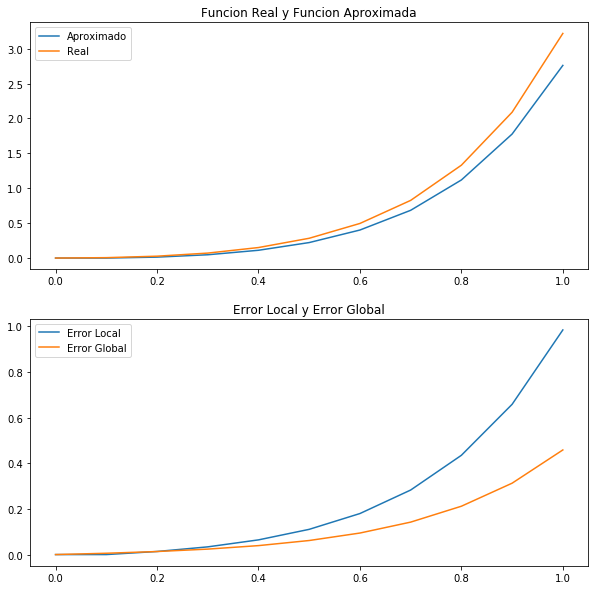

In [5]:
# Definir intervalo I, tamaño de paso h y valor iniciar y0
I = [0,1]
h = 0.10
y0 = 0.0

tabla = Euler(f,yReal,h,I,y0,True)